In [16]:
import numpy as np
import pygimli as pg
from pygimli.physics import ert

In [3]:
data = ert.load("markhausen100.dat")
print(data)
# ert.reciprocalIndices(data)
# if not data.haveData("r"):
    #data["r"] = data["rhoa"] / data["k"]

Data: Sensors: 300 data: 2012, nonzero entries: ['a', 'b', 'err', 'i', 'm', 'n', 'r', 'u', 'valid']


(array([0.02470209, 0.00420243]),
 <Axes: title={'center': '$\\delta$R/R=0.024702+0.004202/|R|'}, xlabel='R ($\\Omega$)', ylabel='$\\delta$R/R'>)

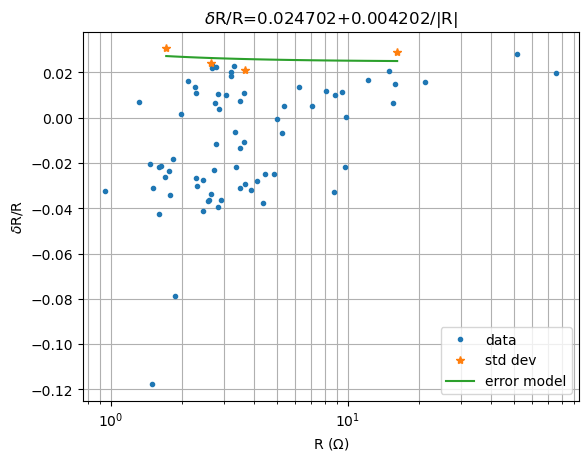

In [4]:
ert.fitReciprocalErrorModel(data, show=True, rel=True)

In [6]:
data["k"] = ert.geometricFactors(data)
data["rhoa"] = data["r"] * data["k"]

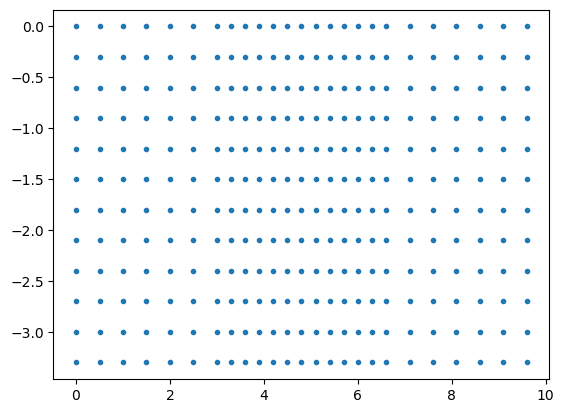

In [7]:
pg.plt.plot(pg.x(data), pg.y(data), '.')

In [8]:
y1 = data.subset(y=-1.5)
print(y1)

Data: Sensors: 25 data: 143, nonzero entries: ['a', 'b', 'err', 'i', 'k', 'm', 'n', 'r', 'rhoa', 'u', 'valid', 'ya', 'yb', 'ym', 'yn']


In [13]:
print(y1.sensors().array())

[[ 0.  -1.5  0. ]
 [ 0.5 -1.5  0. ]
 [ 1.  -1.5  0. ]
 [ 1.5 -1.5  0. ]
 [ 2.  -1.5  0. ]
 [ 2.5 -1.5  0. ]
 [ 3.  -1.5  0. ]
 [ 3.3 -1.5  0. ]
 [ 3.6 -1.5  0. ]
 [ 3.9 -1.5  0. ]
 [ 4.2 -1.5  0. ]
 [ 4.5 -1.5  0. ]
 [ 4.8 -1.5  0. ]
 [ 5.1 -1.5  0. ]
 [ 5.4 -1.5  0. ]
 [ 5.7 -1.5  0. ]
 [ 6.  -1.5  0. ]
 [ 6.3 -1.5  0. ]
 [ 6.6 -1.5  0. ]
 [ 7.1 -1.5  0. ]
 [ 7.6 -1.5  0. ]
 [ 8.1 -1.5  0. ]
 [ 8.6 -1.5  0. ]
 [ 9.1 -1.5  0. ]
 [ 9.6 -1.5  0. ]]


In [17]:
y1.setSensors(y1.sensors()*np.array([1, 0, 1]))
y1.sensors().array()

array([[ 0. , -0. ,  0. ],
       [ 0.5, -0. ,  0. ],
       [ 1. , -0. ,  0. ],
       [ 1.5, -0. ,  0. ],
       [ 2. , -0. ,  0. ],
       [ 2.5, -0. ,  0. ],
       [ 3. , -0. ,  0. ],
       [ 3.3, -0. ,  0. ],
       [ 3.6, -0. ,  0. ],
       [ 3.9, -0. ,  0. ],
       [ 4.2, -0. ,  0. ],
       [ 4.5, -0. ,  0. ],
       [ 4.8, -0. ,  0. ],
       [ 5.1, -0. ,  0. ],
       [ 5.4, -0. ,  0. ],
       [ 5.7, -0. ,  0. ],
       [ 6. , -0. ,  0. ],
       [ 6.3, -0. ,  0. ],
       [ 6.6, -0. ,  0. ],
       [ 7.1, -0. ,  0. ],
       [ 7.6, -0. ,  0. ],
       [ 8.1, -0. ,  0. ],
       [ 8.6, -0. ,  0. ],
       [ 9.1, -0. ,  0. ],
       [ 9.6, -0. ,  0. ]])

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x1682deeb700>)

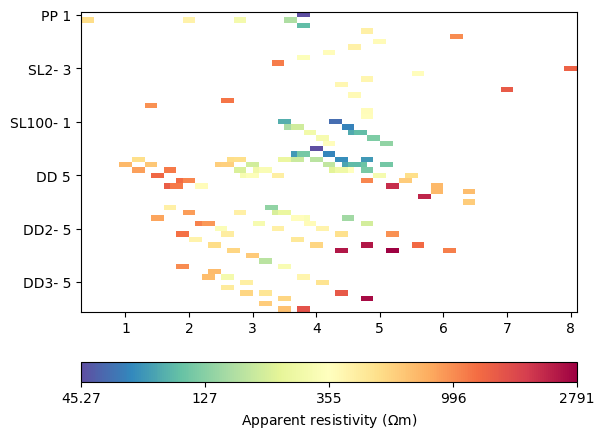

In [9]:
y1.show()

16/03/24 - 07:54:25 - pyGIMLi - INFO - Found 2 regions.
16/03/24 - 07:54:25 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
16/03/24 - 07:54:25 - pyGIMLi - INFO - Found 2 regions.
16/03/24 - 07:54:26 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
16/03/24 - 07:54:26 - pyGIMLi - INFO - Creating forward mesh from region infos.
16/03/24 - 07:54:26 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
16/03/24 - 07:54:26 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 1112 Cells: 2068 Boundaries: 1628
16/03/24 - 07:54:26 - pyGIMLi - INFO - Use median(data values)=413.381054547436
16/03/24 - 07:54:26 - pyGIMLi - INFO - Created startmodel from forward operator: 368, min/max=413.381055/413.381055
16/03/24 - 07:54:26 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000001682E502E50>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000001682E501DB0>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x000001682E502AE0>
min/max (data): 45.27/2791
min/max (error): 3%/500%
min/max (start model): 413/413
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  912.05
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  171.57 (dPhi = 80.97%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   28.36 (dPhi = 80.45%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =    3.74 (dPhi = 69.93%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =    2.76 (dPhi = 10.13%) lam: 20.0
---------------

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x1683241e7c0>)

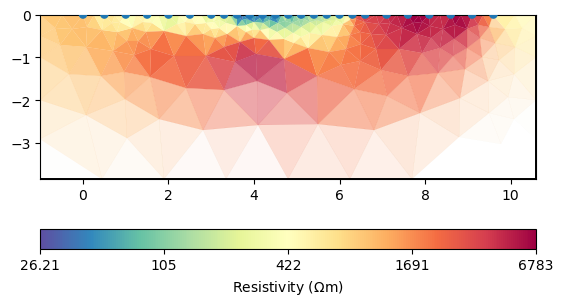

In [18]:
mgr = ert.Manager(y1)
mgr.invert(verbose=True)
mgr.showResult()